In [1]:
# Importing the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [67]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGenerator:
    def __init__(self, width, height, density, num_obstacles, random_seed=None):
        self.width = width
        self.height = height
        self.density = density
        self.num_obstacles = num_obstacles
        self.random_seed = random_seed
        self.grid = self.generate_random_maze()
        self.obstacles = self.init_obstacles()

    def generate_random_maze(self):
        maze = np.random.choice([0, 1], size=(self.height, self.width), p=[1-self.density, self.density])
        maze[0, 0] = 0  # Entrance
        maze[-1, -1] = 0  # Exit
        
        
   # Make the entrance and exit
        # Generate a random path from entrance to exit using random walk
        x, y = 0, 0
        while (x, y) != (self.width - 1, self.height - 1):
            directions = [(0, 1), (1, 0)]
            random.shuffle(directions)
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    #maze[ny, nx] = 0
                    x, y = nx, ny
                    break        
        
        return maze


    def init_obstacles(self):
        if self.random_seed is not None:
            random.seed(self.random_seed)  # Set random seed for Python's random module

        obstacles = []
        for _ in range(self.num_obstacles):
            obstacle = self.generate_obstacle_position()
            obstacles.append(obstacle)
        return obstacles

    def generate_obstacle_position(self):
        while True:
            obstacle = [random.randint(0, self.height - 1), random.randint(0, self.width - 1)]
            if self.grid[obstacle[0], obstacle[1]] == 0:  # Check if the position is empty
                return obstacle

    def update_obstacles(self):

        for obstacle in self.obstacles:
            # Generate random direction
            direction = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
            # Calculate new position
            new_position = [obstacle[0] + direction[0], obstacle[1] + direction[1]]
            # Check boundaries and collisions with static blocks
            if 0 <= new_position[0] < self.height and 0 <= new_position[1] < self.width:
                if self.grid[new_position[0], new_position[1]] == 0:  # Check if the position is empty
                    obstacle[:] = new_position


    def display(self, start_positions, goal_positions, paths=None, dynamic_obstacles = None, animate=False, t_interval = 500):
        fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figsize as needed
        ax.imshow(self.grid, cmap='binary')

        if isinstance(start_positions, list):
            # Mark the entrance and exit positions for each pair
            for i in range(len(start_positions)):
                ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    if dynamic_obstacles:
                        for obstacle in dynamic_obstacles[frame]:
                            ax.scatter(obstacle[1], obstacle[0], color='red', marker='p', s=50, label='Obstacle')                    
                    for i in range(len(start_positions)):
                        ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                        ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')
                        path_x, path_y = zip(*paths[i][:frame+1])
                        ax.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
                        ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths[0]), interval=t_interval)
                plt.show()
                return ani
        else:
            # Mark the entrance and exit positions
            ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
            ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                print('========test===========')
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    if dynamic_obstacles:
                        for obstacle in dynamic_obstacles[frame]:
                            ax.scatter(obstacle[1], obstacle[0], color='red', marker='p', s=50, label='Obstacle')
                    print(dynamic_obstacles[frame])  
                    print(frame)
                    ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
                    ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')
                    path_x, path_y = zip(*paths[:frame+1])
                    ax.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
                    ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths), interval=t_interval)
                plt.show()
                return ani
        plt.legend()
        plt.show()



    # def display(self, start_positions, goal_positions, paths=None):
    #     plt.imshow(self.grid, cmap='binary')

    #     if isinstance(start_positions, list):
    #         # Mark the entrance and exit positions for each pair
    #         for i in range(len(start_positions)):
    #             plt.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
    #             plt.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned paths for each pair
    #             for i in range(len(paths)):
    #                 path_x, path_y = zip(*paths[i])
    #                 plt.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
    #     else:
    #         # Mark the entrance and exit positions
    #         plt.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
    #         plt.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned path
    #             path_x, path_y = zip(*paths)
    #             plt.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
    #     plt.legend()
    #     plt.show()







Map Width: 137
Map height: 183


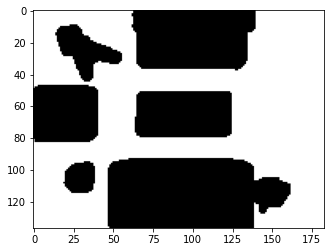

In [18]:
# Initializing the world from the picture
filename = 'resized_image.png'
image = plt.imread('map/' + filename)
mapWidth, mapHeight = image.shape
print("Map Width:", mapWidth)
print("Map height:", mapHeight)

fig,ax = plt.subplots(1)

# Global class for the whole environment
ax.imshow(image, cmap="gray")

# startPos = start_point_record[0]
startPos = (154, 39)
# goalPos = end_point_record[0]
goalPos = (14, 124)

In [59]:
# Create a maze generator instance
# Define the dimensions of the maze
width = 183#137
height = 137#183

# Define the density of walls in the maze (between 0 and 1)
density = 0.25
maze_generator = MazeGenerator(width, height, density, 0)

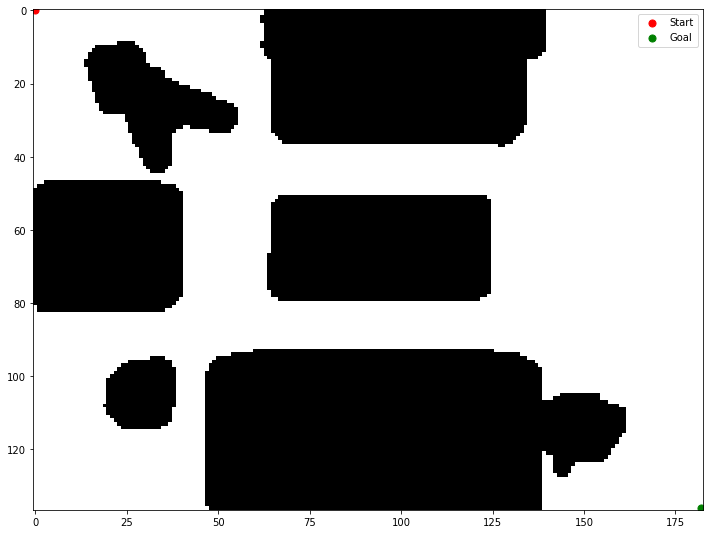

In [60]:


maze_generator.grid = np.abs(image-1)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

In [61]:
from collections import deque

def calculate_distance_to_nearest_block_and_edge(grid):
    rows = len(grid)
    cols = len(grid[0])
    
    # Initialize the distance matrix with a large value (infinity)
    distance = [[float('inf')] * cols for _ in range(rows)]
    
    # Initialize a queue and add all block cells to the queue
    queue = deque()
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 1:  # Block cell
                queue.append((r, c))
                distance[r][c] = 0  # Distance is 0 for block cells
    
    # Directions for neighbors (up, down, left, right)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    
    # Perform BFS from block cells
    while queue:
        r, c = queue.popleft()
        
        # Check all neighbors
        for dr, dc in directions:
            new_r, new_c = r + dr, c + dc
            
            # Check if the neighbor is within bounds and is a free space
            if 0 <= new_r < rows and 0 <= new_c < cols and grid[new_r][new_c] == 0:
                # Calculate the new distance
                new_distance = distance[r][c] + 1
                
                # If the new distance is shorter, update the distance matrix and enqueue the neighbor
                if new_distance < distance[new_r][new_c]:
                    distance[new_r][new_c] = new_distance
                    queue.append((new_r, new_c))
    
    # Calculate distance to the edge of the map
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 0:  # Free space cell
                # Calculate distance to the edges of the map
                distance_to_edge = min(r, rows - r - 1, c, cols - c - 1)
                
                # Update the distance matrix with the smaller of the distance to block or edge
                distance[r][c] = min(distance[r][c], distance_to_edge)
    
    # Return the distance matrix as a list of lists
    return distance

# Example usage:
grid = [
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [1, 0, 0, 0]
]

# Calculate the distance matrix
distance_matrix = calculate_distance_to_nearest_block_and_edge(grid)

# Print the distance matrix as a list of lists
for row in distance_matrix:
    print(row)


[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 1, 1, 0]
[0, 0, 0, 0]


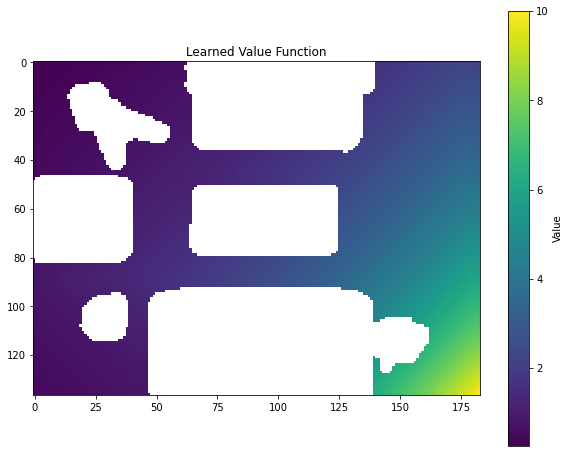

In [62]:
class ValueIterationMazeSolver:
    def __init__(self, maze, startPos, goalPos, gamma=0.99, epsilon=1e-4):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Convergence threshold
        self.height, self.width = maze.shape  # Get maze dimensions
        self.V = np.zeros((self.height, self.width))-00  # Value function initialized to zeros
        self.max_it = 5000
        self.penalty_factor = 0.01

        # Calculate distances to walls
        self.distances_to_walls = np.array(calculate_distance_to_nearest_block_and_edge(maze))

    def value_iteration(self):
        num_it = 0
        while True:
            delta = 0
            for i in range(self.height):
                for j in range(self.width):
                    if self.maze[i, j] == 1:  # Skip if it's a wall
                        self.V[i, j] = -np.inf
                        continue
                    v = self.V[i, j]
                    self.V[i, j] = self.compute_max_value(i, j)
                    delta = max(delta, abs(v - self.V[i, j]))
            if delta < self.epsilon:
                break
            num_it = num_it + 1
            if num_it > self.max_it:
                print('precesion = {}'.format(delta))
                break

    def greedy_policy(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        
        max_value = -np.inf
        next_v = np.zeros((4,1))
        # greedy_policy
        ac_idx = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        for action in actions:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                next_v[ac_idx] = value
                max_value = max(max_value, value)
            else:
                next_v[ac_idx] = -np.inf
            ac_idx = ac_idx + 1

        greedy_actions = [i for i, tmp_v in enumerate(next_v) if tmp_v == max_value]
                  
        return actions[np.random.choice(greedy_actions)]

    def compute_max_value(self, i, j):
        if (i, j) == self.goalPos:
            return 10  # Value of the goal state (reward for reaching the goal)
        
        max_value = -np.inf
        reward_penalty = -self.penalty_factor / (self.distances_to_walls[i, j] + 1)
        
        for action in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                max_value = max(max_value, value)
        
        return reward_penalty + self.gamma * max_value

    def get_optimal_path(self):
        path = [self.startPos]
        i, j = self.startPos
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        while (i, j) != self.goalPos:
            max_value = -np.inf
            next_pos = None
            action = self.greedy_policy(i,j)
            i_, j_ = i + action[0], j + action[1]
            next_pos = (i_, j_)
            path.append(next_pos)
            i, j = next_pos
        return path
    

    def plot_value_function(self):
        plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
        plt.imshow(self.V, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Value')
        plt.title('Learned Value Function')
        plt.show()



# 
solver = ValueIterationMazeSolver(maze_generator.grid, startPos, goalPos)
solver.value_iteration()
solver.plot_value_function()

Optimal Path: [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (5, 21), (5, 22), (5, 23), (5, 24), (5, 25), (5, 26), (5, 27), (5, 28), (5, 29), (5, 30), (6, 30), (6, 31), (7, 31), (7, 32), (7, 33), (8, 33), (8, 34), (8, 35), (9, 35), (9, 36), (9, 37), (9, 38), (10, 38), (10, 39), (10, 40), (10, 41), (10, 42), (11, 42), (11, 43), (11, 44), (11, 45), (11, 46), (12, 46), (12, 47), (12, 48), (12, 49), (12, 50), (13, 50), (13, 51), (13, 52), (14, 52), (14, 53), (14, 54), (15, 54), (15, 55), (16, 55), (17, 55), (18, 55), (18, 56), (19, 56), (20, 56), (20, 57), (21, 57), (22, 57), (22, 58), (23, 58), (23, 59), (24, 59), (25, 59), (26, 59), (27, 59), (28, 59), (29, 59), (30, 59), (31, 59), (32, 59), (33, 59), (34, 59), (35, 59), (36, 59), (37, 59), (38, 59), (39, 59), (40, 59), (41, 59), (42, 59), (43, 59), (44, 59), (44, 60)

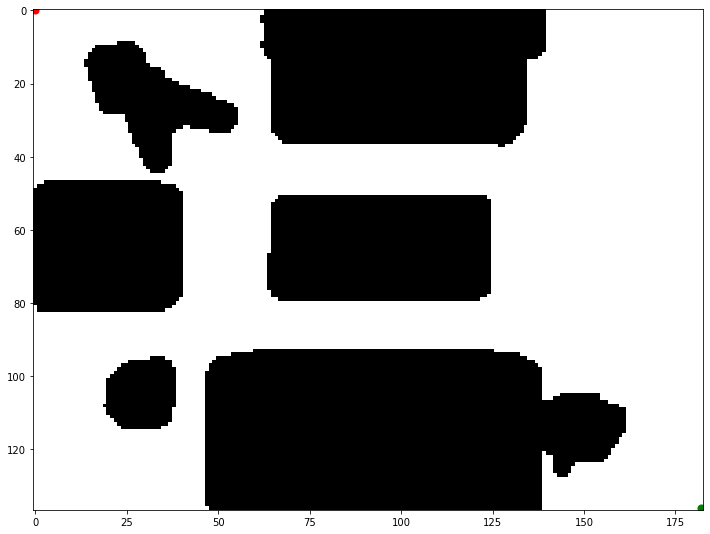

In [63]:
optimal_path = solver.get_optimal_path()
print("Optimal Path:", optimal_path)
# Display the maze with the learned path
ani = maze_generator.display(startPos, goalPos, optimal_path, animate=True, tres=10)
ani.save('path_plan_realistic_world.gif', writer='pillow')

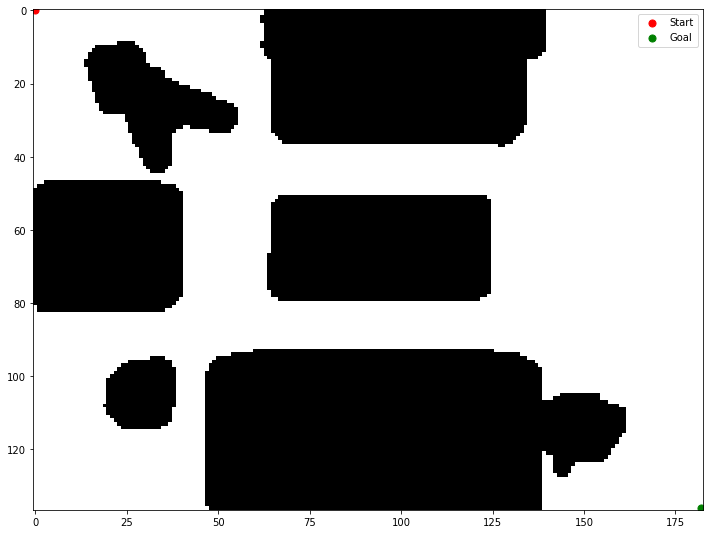

In [90]:
# Create a maze generator instance
# Define the dimensions of the maze
width = 183#137
height = 137#183

# Define the density of walls in the maze (between 0 and 1)
density = 0.25
num_dyn_obstacles = 50
maze_generator = MazeGenerator(width, height, density, num_obstacles=num_dyn_obstacles)


maze_generator.grid = np.abs(image-1)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

In [93]:
class generate_path:
    def __init__(self, maze_generator, startPos, goalPos, V):
        self.maze_org = maze_generator.grid
        self.startPos = startPos
        self.goalPos = goalPos
        self.height, self.width = self.maze_org.shape  # Get maze dimensions
        self.orig_V = V  # Value function initialized to zeros
        self.V = np.copy(self.orig_V)
        self.maze = np.copy(self.maze_org)
        self.dynamic_obstacles = []  

    def greedy_policy(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        
        max_value = -np.inf
        next_v = np.zeros((4,1))
        # greedy_policy
        ac_idx = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        for action in actions:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                next_v[ac_idx] = value
                max_value = max(max_value, value)
            else:
                next_v[ac_idx] = -np.inf
            ac_idx = ac_idx + 1
        print(next_v)
        greedy_actions = [i for i, tmp_v in enumerate(next_v) if tmp_v == max_value]
        if max_value == -np.inf:
            action = (0,0)
        else:
            action =  actions[np.random.choice(greedy_actions)]
        print(max_value)
        return action
    
    # def update_V_values(self):
    #     self.V = np.copy(self.orig_V)  # Copy original V values to temporary V values
    #     self.maze = np.copy(self.maze_org)
    #     for obstacle in maze_generator.obstacles:
    #         row, col = obstacle
    #         neighbors = [(row+1, col), (row-1, col), (row, col), (row, col+1), (row, col-1),]
    #         for r, c in neighbors:
    #             if 0 <= r < self.height and 0 <= c < self.width:
    #                 self.V[r, c] = -np.inf
    #                 self.maze[r,c] = 1



    def update_V_values(self, n=1):
        # Initialize V and maze with copies of the original values
        self.V = np.copy(self.orig_V)
        self.maze = np.copy(self.maze_org)
        
        # Iterate through each obstacle
        for obstacle in maze_generator.obstacles:
            row, col = obstacle
            
            # Iterate through each cell in a square region around the obstacle
            for dr in range(-n, n + 1):
                for dc in range(-n, n + 1):
                    # Calculate the neighboring cell's row and column
                    new_r = row + dr
                    new_c = col + dc
                    
                    # Check if the cell is within the bounds of the maze
                    if 0 <= new_r < self.height and 0 <= new_c < self.width:
                        # Update the distance value to -inf (or whatever desired value)
                        self.V[new_r, new_c] = -np.inf
                        # Update the maze state to 1 (blocked)
                        self.maze[new_r, new_c] = 1                    
 
    def get_optimal_path(self):
        path = [self.startPos]
        i, j = self.startPos
        random.seed(100)
        maze_generator.obstacles = maze_generator.init_obstacles()
        while self.startPos in maze_generator.obstacles:
            print("Start position is obstructed by an obstacle")
            maze_generator.obstacles = maze_generator.init_obstacles()

        self.dynamic_obstacles.append(np.copy(maze_generator.obstacles))
        while (i, j) != self.goalPos:
            next_pos = None
            self.update_V_values(n=1)
            action = self.greedy_policy(i,j)
            i_, j_ = i + action[0], j + action[1]
            next_pos = (i_, j_)
            path.append(next_pos)
            i, j = next_pos
            maze_generator.update_obstacles()
            self.dynamic_obstacles.append(np.copy(maze_generator.obstacles))
            
        return path




In [94]:
path_gen = generate_path(maze_generator, startPos, goalPos, solver.V)
path = path_gen.get_optimal_path()

[[      -inf]
 [0.27514979]
 [      -inf]
 [0.27514979]]
0.27514979209791124
[[      -inf]
 [0.28803009]
 [0.26239829]
 [0.28303009]]
0.28803009302819316
[[0.27514979]
 [0.29598999]
 [0.27514979]
 [0.29598999]]
0.2959899929577709
[[0.28803009]
 [0.30236363]
 [0.28303009]
 [0.3040303 ]]
0.3040302959169403
[[0.29598999]
 [0.31046831]
 [0.29598999]
 [0.31046831]]
0.3104683123740138
[[0.3040303 ]
 [0.31613803]
 [0.30236363]
 [0.31697136]]
0.31697135930035064
[[0.31046831]
 [0.32269834]
 [0.31046831]
 [0.32269834]]
0.32269834272762693
[[0.31613803]
 [0.32848317]
 [0.31697136]
 [0.32798317]]
0.3284831744723504
[[0.32269834]
 [0.33382139]
 [0.32269834]
 [0.33382139]]
0.3338213883559095
[[0.32798317]
 [0.33921352]
 [0.32848317]
 [0.33712697]]
0.3392135235918278
[[0.33382139]
 [0.34432342]
 [0.33382139]
 [0.3425525 ]]
0.34432342450352976
[[0.33921352]
 [0.34948494]
 [0.33888019]
 [0.34769613]]
0.34948494057595597
[[0.34432342]
 [0.35469859]
 [0.34399009]
 [0.35265121]]
0.3546985931743663
[[0.34

========test===========


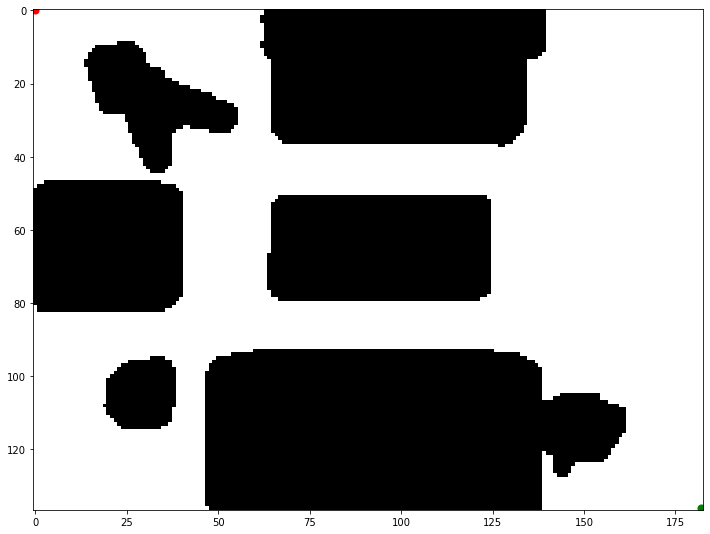

[[ 37 117]
 [116  44]
 [ 28 136]
 [ 31  20]
 [ 12 168]
 [ 52  45]
 [ 36  48]
 [ 88  94]
 [ 41 166]
 [  1 154]
 [ 41  49]
 [ 42   6]
 [ 13 155]
 [ 63 158]
 [129 182]
 [ 74 176]
 [ 86 135]
 [ 87 138]
 [ 92 123]
 [102  15]
 [ 61 180]
 [126 149]
 [ 14 173]
 [ 83  42]
 [ 30  12]
 [134 159]
 [ 55 166]
 [ 91  85]
 [116   3]
 [ 49 134]
 [ 30 152]
 [102 173]
 [ 38 158]
 [122 139]
 [  9 179]
 [113  41]
 [ 12  50]
 [ 24   9]
 [ 35  54]
 [102   9]
 [ 49 155]
 [ 37  53]
 [105  19]
 [ 66 181]
 [  6 142]
 [ 75  59]
 [103   2]
 [ 20  56]
 [ 76 164]
 [  5  22]]
0
[[ 37 117]
 [116  44]
 [ 28 136]
 [ 31  20]
 [ 12 168]
 [ 52  45]
 [ 36  48]
 [ 88  94]
 [ 41 166]
 [  1 154]
 [ 41  49]
 [ 42   6]
 [ 13 155]
 [ 63 158]
 [129 182]
 [ 74 176]
 [ 86 135]
 [ 87 138]
 [ 92 123]
 [102  15]
 [ 61 180]
 [126 149]
 [ 14 173]
 [ 83  42]
 [ 30  12]
 [134 159]
 [ 55 166]
 [ 91  85]
 [116   3]
 [ 49 134]
 [ 30 152]
 [102 173]
 [ 38 158]
 [122 139]
 [  9 179]
 [113  41]
 [ 12  50]
 [ 24   9]
 [ 35  54]
 [102   9]
 [ 49 1

In [95]:

# Display the maze with the learned path
ani = maze_generator.display(startPos, goalPos, path, path_gen.dynamic_obstacles,animate=True, t_interval=10)
ani.save('realistic_map_dyn.gif', writer='pillow')